## Weight Sum of Helpfulness Metrics

Here we are going to create a function that prints out the importance of each helpfulness metric. Once we have the function, it can be used to look at the overall weights as well as weights for individual workers.

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def calculate_metric_weights(df, worker_id=None):
    '''
    Calculate the weight of each helpfulness metric for a given writer.

    Input: csv file

    Output: dictionary of feature importance
    '''

    # Select relevant columns
    features = ['tone_similarity',	'pos_similarity',	'coherence_score',	'syn_similarity',	'ai_coverage']
    target = 'acceptance_status'

    # Filter for specific writer if worker_id is provided
    if worker_id:
        df = df[df['workerID'] == worker_id]

    # Drop rows with missing values
    df = df.dropna(subset=features + [target])

    # Convert target to binary, accepted is 1 and rejected is 0
    df[target] = df[target].apply(lambda x: 1 if x == 'accepted' else 0)

    if df[target].nunique() < 2:
        print(f"WorkerID: {worker_id} has only one class in target variable. Skipping...")
        return {}

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])
    y = df[target]

    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X, y)

    # Get absolute values of coefficients and normalize them to sum to 1
    weights = np.abs(model.coef_[0])
    weights /= weights.sum()

    # Return dictionary of feature importance
    return dict(zip(features, weights))


In [4]:
df = pd.read_csv("all_metrics_upd.csv")

# Get overall weights
weights = calculate_metric_weights(df)
print(weights)

# Get weights for all writers
unique_workers = df['workerID'].unique()

for worker in unique_workers:
  weights = calculate_metric_weights(df, worker_id=worker)
  print(f'WorkerID: {worker}, Weights: {weights}')

{'tone_similarity': 0.07758531261918378, 'pos_similarity': 0.3341039854969208, 'coherence_score': 0.45104751656498815, 'syn_similarity': 0.03702799519444506, 'ai_coverage': 0.10023519012446222}
WorkerID: A2WGW5Y3ZFBDEC, Weights: {'tone_similarity': 0.2320297946292556, 'pos_similarity': 0.1901218311849363, 'coherence_score': 0.011560217587770755, 'syn_similarity': 0.37453692461188215, 'ai_coverage': 0.19175123198615507}
WorkerID: AZCGF2D7QIO10, Weights: {'tone_similarity': 0.03929922174212228, 'pos_similarity': 0.26295291155230843, 'coherence_score': 0.2447686117926599, 'syn_similarity': 0.2838165481685913, 'ai_coverage': 0.1691627067443181}
WorkerID: A345TDMHP3DQ3G, Weights: {'tone_similarity': 0.06473990785379341, 'pos_similarity': 0.3060658322749765, 'coherence_score': 0.4475075526413485, 'syn_similarity': 0.14508921036295336, 'ai_coverage': 0.03659749686692819}
WorkerID: A2W121DQXNQK1, Weights: {'tone_similarity': 0.38613892230010555, 'pos_similarity': 0.038879412895732296, 'coheren

In [5]:
def calculate_weights_for_all_workers(df, unique_workers):
  '''
  Calculate the weight of each helpfulness metric for all writers.

  Input: csv file

  Output: dictionary of dictionary of feature importance
  '''

  worker_weights = {}
  for worker in unique_workers:
      weights = calculate_metric_weights(df, worker_id=worker)
      worker_weights[worker] = weights

  return worker_weights

WorkerID: A17Q4QN6UE0EZC has only one class in target variable. Skipping...
WorkerID: AFIK3VBMMX6G6 has only one class in target variable. Skipping...
WorkerID: A1WKF2VH7TV0H2 has only one class in target variable. Skipping...
WorkerID: A173MXK429XAZQ has only one class in target variable. Skipping...
WorkerID: A6KOTWP7N7RLU has only one class in target variable. Skipping...
WorkerID: A3HE29W5IDR394 has only one class in target variable. Skipping...
WorkerID: A394JO4NEPCY3M has only one class in target variable. Skipping...


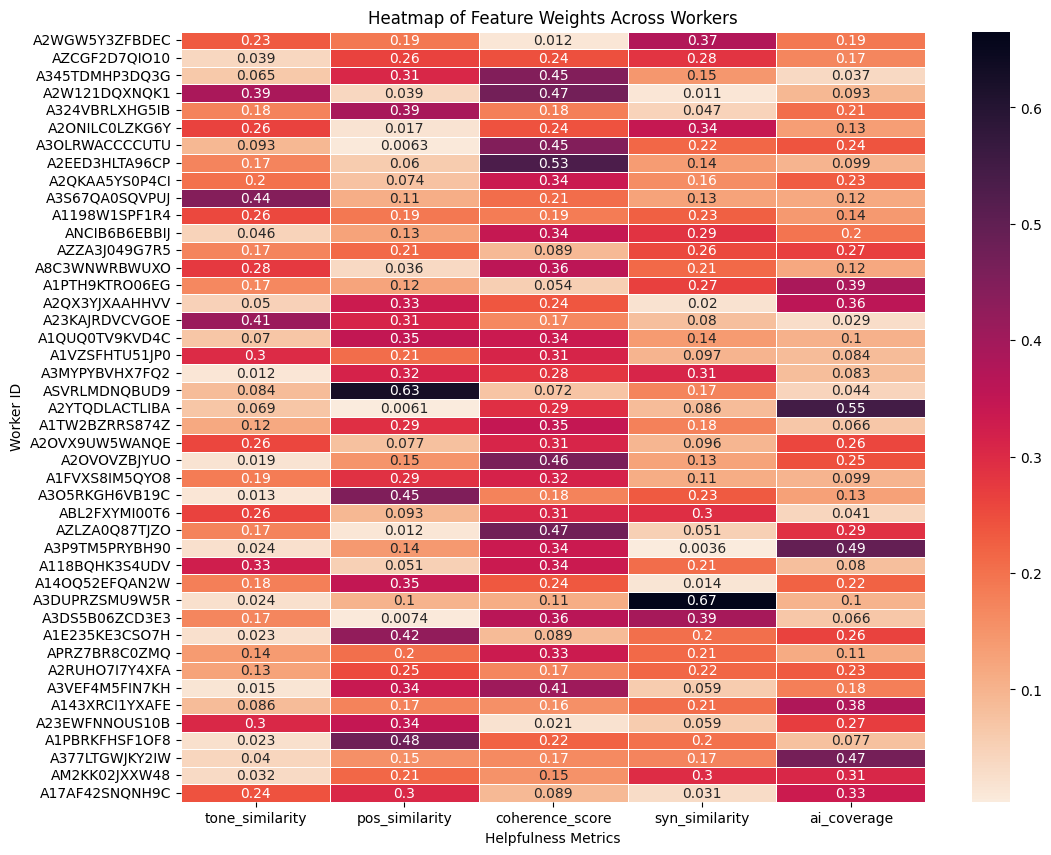

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

worker_weights = calculate_weights_for_all_workers(df, unique_workers)
df_weights = pd.DataFrame.from_dict(worker_weights, orient='index')

plt.figure(figsize=(12, 10))
sns.heatmap(df_weights, annot=True, cmap="rocket_r", linewidths=0.5)
plt.xlabel("Helpfulness Metrics")
plt.ylabel("Worker ID")
plt.title("Heatmap of Feature Weights Across Workers")

plt.savefig('heatmap.png', dpi=300)
plt.show()

<Figure size 400x1000 with 0 Axes>

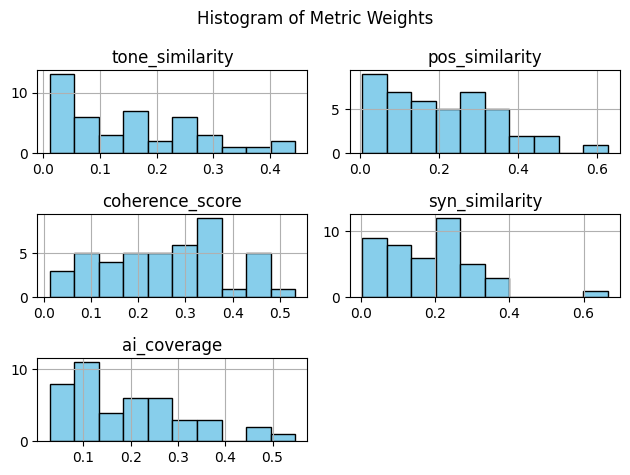

In [7]:
# histogram of metric weights
plt.figure(figsize=(4, 10))
df_weights.hist(bins=10, color='skyblue', edgecolor='black')
plt.suptitle('Histogram of Metric Weights', fontsize=12)
plt.xlabel('Weight', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

#save img
plt.savefig('metric_weights_histogram.png')

plt.tight_layout()
plt.show()


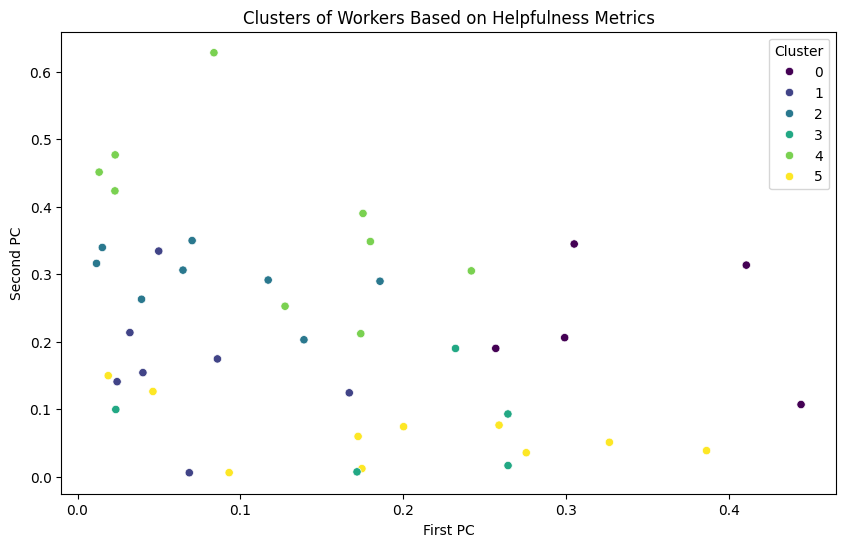

In [8]:
from sklearn.cluster import KMeans
# Apply KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)
df_weights['Cluster'] = kmeans.fit_predict(df_weights)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_weights.iloc[:, 0], y=df_weights.iloc[:, 1], hue=df_weights['Cluster'], palette='viridis')
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.title("Clusters of Workers Based on Helpfulness Metrics")
plt.legend(title="Cluster")
plt.show()